In [72]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm
import sys
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from pathlib import Path
from torchvision import transforms
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [73]:
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

'cuda'

### Base model_V0

In [15]:
%load_ext autoreload
%autoreload 2

nb_dir = os.path.split(os.getcwd())[0]
nb_dir
print(nb_dir)

if nb_dir not in sys.path:
    print("Nb dir is not in system path")
    sys.path.append(nb_dir)
else:
    print("Nb dir already exists in sys path")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\CodingHenry\food_detection\ml
Nb dir already exists in sys path


### Data Transforms

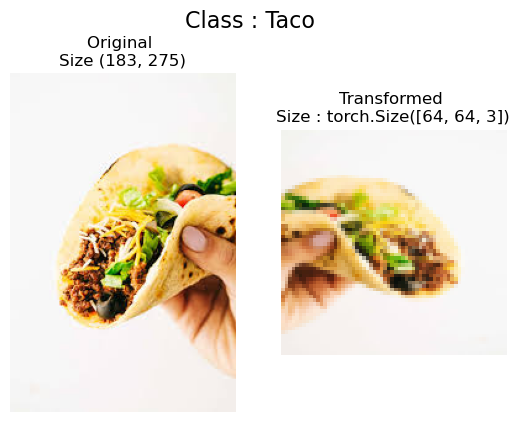

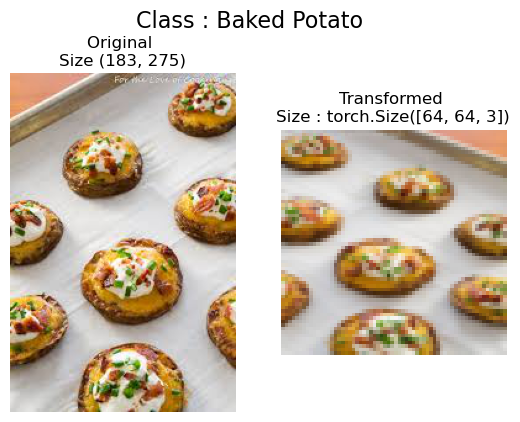

In [57]:
from utils.util import plot_transformed_image

root_image_path = Path().cwd().parent / "data" / "Fast_Food_Classification_V2" / "Train"

test_images_path = [f for f in root_image_path.rglob("*.jpeg")]

data_transform_v0 = transforms.Compose([
    # resize image
    transforms.Resize(size=(64, 64)),

    # flip images
    transforms.RandomHorizontalFlip(p=0.5),

    # turn image to torch tensor
    transforms.ToTensor()
])

plot_transformed_image(image_path=test_images_path,
                       transform=data_transform_v0,
                       seed=None,
                       n=2)

### DataLoader & ImageFolder

In [74]:
# We skipped the train/test/validation split since the dataset had already been filtered

root_train_folder_path = Path().cwd().parent / "data" / "Fast_Food_Classification_V2" / "Train"
root_validation_folder_path = Path().cwd().parent / "data" / "Fast_Food_Classification_V2" / "Valid"
root_test_folder_path = Path().cwd().parent / "data" / "Fast_Food_Classification_V2" / "Test"

train_dataset = ImageFolder(root=root_train_folder_path,
                            transform=data_transform_v0,
                            target_transform=None,  
                            allow_empty=True)

validation_dataset = ImageFolder(root=root_validation_folder_path,
                            transform=data_transform_v0,
                            target_transform=None,
                            allow_empty=True)

test_dataset = ImageFolder(root=root_test_folder_path,
                            transform=data_transform_v0,
                            target_transform=None,
                            allow_empty=True)

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              num_workers=1,
                              shuffle=True)

validation_dataloader = DataLoader(dataset=validation_dataset,
                              batch_size=32,
                              num_workers=1,
                              shuffle=False)

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=32,
                              num_workers=1,
                              shuffle=False)

### Training The Model

In [81]:
from classes.model_0 import Cnn_v0

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = Cnn_v0(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_dataset.classes))

optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn = torch.nn.CrossEntropyLoss()

In [80]:
# from utils.model_utils import train_step, valid_step, test_step, train

# NUM_EPOCHS = 10


# start_time = timer()
# model_0_results = train(model=model_0,
#                 optimizer=optimizer,
#                 loss_fn=loss_fn,
#                 train_dataloader=train_dataloader,
#                 test_dataloader=test_dataloader,
#                 validation_dataloader=validation_dataloader,
#                 n_epochs=NUM_EPOCHS)
# end_time = timer()

# print(f"Total training time: {end_time-start_time:.3f} seconds")
# print("MODEL 0 RESULTS : ", model_0_results)